In [4]:
# Import necessary libraries for advanced EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [5]:
# Load the dataset
df = pd.read_csv('/kaggle/input/adults-who-smoke/share-of-adults-who-smoke.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nFirst 5 rows:")
df.head()

Dataset loaded successfully!
Dataset shape: (1408, 3)

Column names:
['Entity', 'Year', 'Share of adults who smoke or use tobacco (age-standardized)']

Data types:
Entity                                                          object
Year                                                             int64
Share of adults who smoke or use tobacco (age-standardized)    float64
dtype: object

First 5 rows:


,Entity,Year,Share of adults who smoke or use tobacco (age-standardized)
0,Afghanistan,2000,39.2
1,Afghanistan,2005,34.2
2,Afghanistan,2007,32.5
3,Afghanistan,2010,30.2
4,Afghanistan,2015,26.6


In [6]:
# Let's rename the column for easier handling
df = df.rename(columns={
    'Share of adults who smoke or use tobacco (age-standardized)': 'smoking_rate'
})

print("Dataset Information:")
print(f"Number of unique countries: {df['Entity'].nunique()}")
print(f"Year range: {df['Year'].min()} to {df['Year'].max()}")
print(f"Smoking rate range: {df['smoking_rate'].min():.1f}% to {df['smoking_rate'].max():.1f}%")

print("\nUnique countries (first 20):")
print(df['Entity'].unique()[:20])

print("\nUnique years:")
print(sorted(df['Year'].unique()))

# Basic info about the dataset
print("\nDataset info:")
df.info()

Dataset Information:
Number of unique countries: 176
Year range: 2000 to 2022
Smoking rate range: 3.3% to 68.0%

Unique countries (first 20):
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Argentina'
 'Armenia' 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan']

Unique years:
[2000, 2005, 2007, 2010, 2015, 2020, 2021, 2022]

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Entity        1408 non-null   object 
 1   Year          1408 non-null   int64  
 2   smoking_rate  1408 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.1+ KB


In [7]:
# Data Quality Assessment
print("=== DATA QUALITY ASSESSMENT ===\n")

# 1. Missing values
print("1. Missing Values Check:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"Total missing values: {missing_values.sum()}")

# 2. Duplicate records
print("\n2. Duplicate Records Check:")
duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

if duplicates > 0:
    print("Duplicate rows:")
    print(df[df.duplicated()])

# 3. Check for duplicate Entity-Year combinations
print("\n3. Duplicate Entity-Year Combinations:")
entity_year_dupes = df.duplicated(subset=['Entity', 'Year']).sum()
print(f"Number of duplicate Entity-Year combinations: {entity_year_dupes}")

if entity_year_dupes > 0:
    dupes_df = df[df.duplicated(subset=['Entity', 'Year'], keep=False)].sort_values(['Entity', 'Year'])
    print("Duplicate Entity-Year combinations:")
    print(dupes_df)

=== DATA QUALITY ASSESSMENT ===

1. Missing Values Check:
Entity          0
Year            0
smoking_rate    0
dtype: int64
Total missing values: 0

2. Duplicate Records Check:
Number of duplicate records: 0

3. Duplicate Entity-Year Combinations:
Number of duplicate Entity-Year combinations: 0


In [8]:
# 4. Outlier Detection
print("4. Outlier Analysis:")
print(f"Smoking rate statistics:")
print(df['smoking_rate'].describe())

# Identify potential outliers using IQR method
Q1 = df['smoking_rate'].quantile(0.25)
Q3 = df['smoking_rate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['smoking_rate'] < lower_bound) | (df['smoking_rate'] > upper_bound)]
print(f"\nOutliers (IQR method): {len(outliers)} records")

if len(outliers) > 0:
    print("Countries with extreme smoking rates:")
    print(outliers.sort_values('smoking_rate').to_string())

# 5. Check for data consistency
print("\n5. Data Consistency Checks:")

# Check if Entity contains both countries and regions
print("\nPotential regions/aggregates in Entity (not individual countries):")
potential_regions = ['World', 'Africa', 'Asia', 'Europe', 'North America', 'South America', 
                    'Oceania', 'European Union', 'High income', 'Low income', 'Middle income']
regions_found = df[df['Entity'].isin(potential_regions)]['Entity'].unique()
print(f"Found regions: {regions_found}")

# Check data coverage by year
print("\n6. Data Coverage by Year:")
coverage_by_year = df.groupby('Year').size()
print(coverage_by_year)

4. Outlier Analysis:
Smoking rate statistics:
count    1408.000000
mean       23.932135
std        11.041643
min         3.300000
25%        14.900000
50%        23.350000
75%        31.300000
max        68.000000
Name: smoking_rate, dtype: float64

Outliers (IQR method): 11 records
Countries with extreme smoking rates:
         Entity  Year  smoking_rate
674    Kiribati  2007          57.4
898       Nauru  2007          57.8
104  Bangladesh  2000          58.1
882     Myanmar  2007          58.2
897       Nauru  2005          59.6
673    Kiribati  2005          60.5
881     Myanmar  2005          60.5
896       Nauru  2000          63.6
904       Nepal  2000          64.7
880     Myanmar  2000          65.4
672    Kiribati  2000          68.0

5. Data Consistency Checks:

Potential regions/aggregates in Entity (not individual countries):
Found regions: ['Africa' 'Asia' 'Europe' 'North America' 'Oceania' 'South America'
 'World']

6. Data Coverage by Year:
Year
2000    176
2005    176


In [9]:
# Separate countries from regions for better analysis
regions = ['World', 'Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']
df_countries = df[~df['Entity'].isin(regions)].copy()
df_regions = df[df['Entity'].isin(regions)].copy()

print("=== DESCRIPTIVE STATISTICS ===\n")
print(f"Countries dataset: {df_countries.shape[0]} records")
print(f"Regions dataset: {df_regions.shape[0]} records")

# Overall distribution analysis
print("\n1. Overall Smoking Rate Distribution (Countries only):")
print(df_countries['smoking_rate'].describe())

print("\n2. Distribution by Year (Countries):")
year_stats = df_countries.groupby('Year')['smoking_rate'].agg(['count', 'mean', 'std', 'min', 'max'])
print(year_stats)

print("\n3. Top 10 Countries with Highest Average Smoking Rates:")
top_smokers = df_countries.groupby('Entity')['smoking_rate'].mean().nlargest(10)
print(top_smokers)

print("\n4. Top 10 Countries with Lowest Average Smoking Rates:")
low_smokers = df_countries.groupby('Entity')['smoking_rate'].mean().nsmallest(10)
print(low_smokers)

=== DESCRIPTIVE STATISTICS ===

Countries dataset: 1352 records
Regions dataset: 56 records

1. Overall Smoking Rate Distribution (Countries only):
count    1352.000000
mean       23.946104
std        11.188656
min         3.300000
25%        14.800000
50%        23.300000
75%        31.500000
max        68.000000
Name: smoking_rate, dtype: float64

2. Distribution by Year (Countries):
      count       mean        std  min   max
Year                                        
2000    169  30.395726  12.618281  6.3  68.0
2005    169  27.213170  11.353158  6.0  60.5
2007    169  26.100007  10.970611  5.6  58.2
2010    169  24.568566  10.506827  5.1  55.6
2015    169  22.399919  10.045801  4.3  52.6
2020    169  20.617794   9.800443  3.6  49.4
2021    169  20.292908   9.772750  3.4  48.9
2022    169  19.980739   9.743573  3.3  48.3

3. Top 10 Countries with Highest Average Smoking Rates:
Entity
Nauru               54.4750
Myanmar             53.0625
Kiribati            51.0500
Papua New Gui

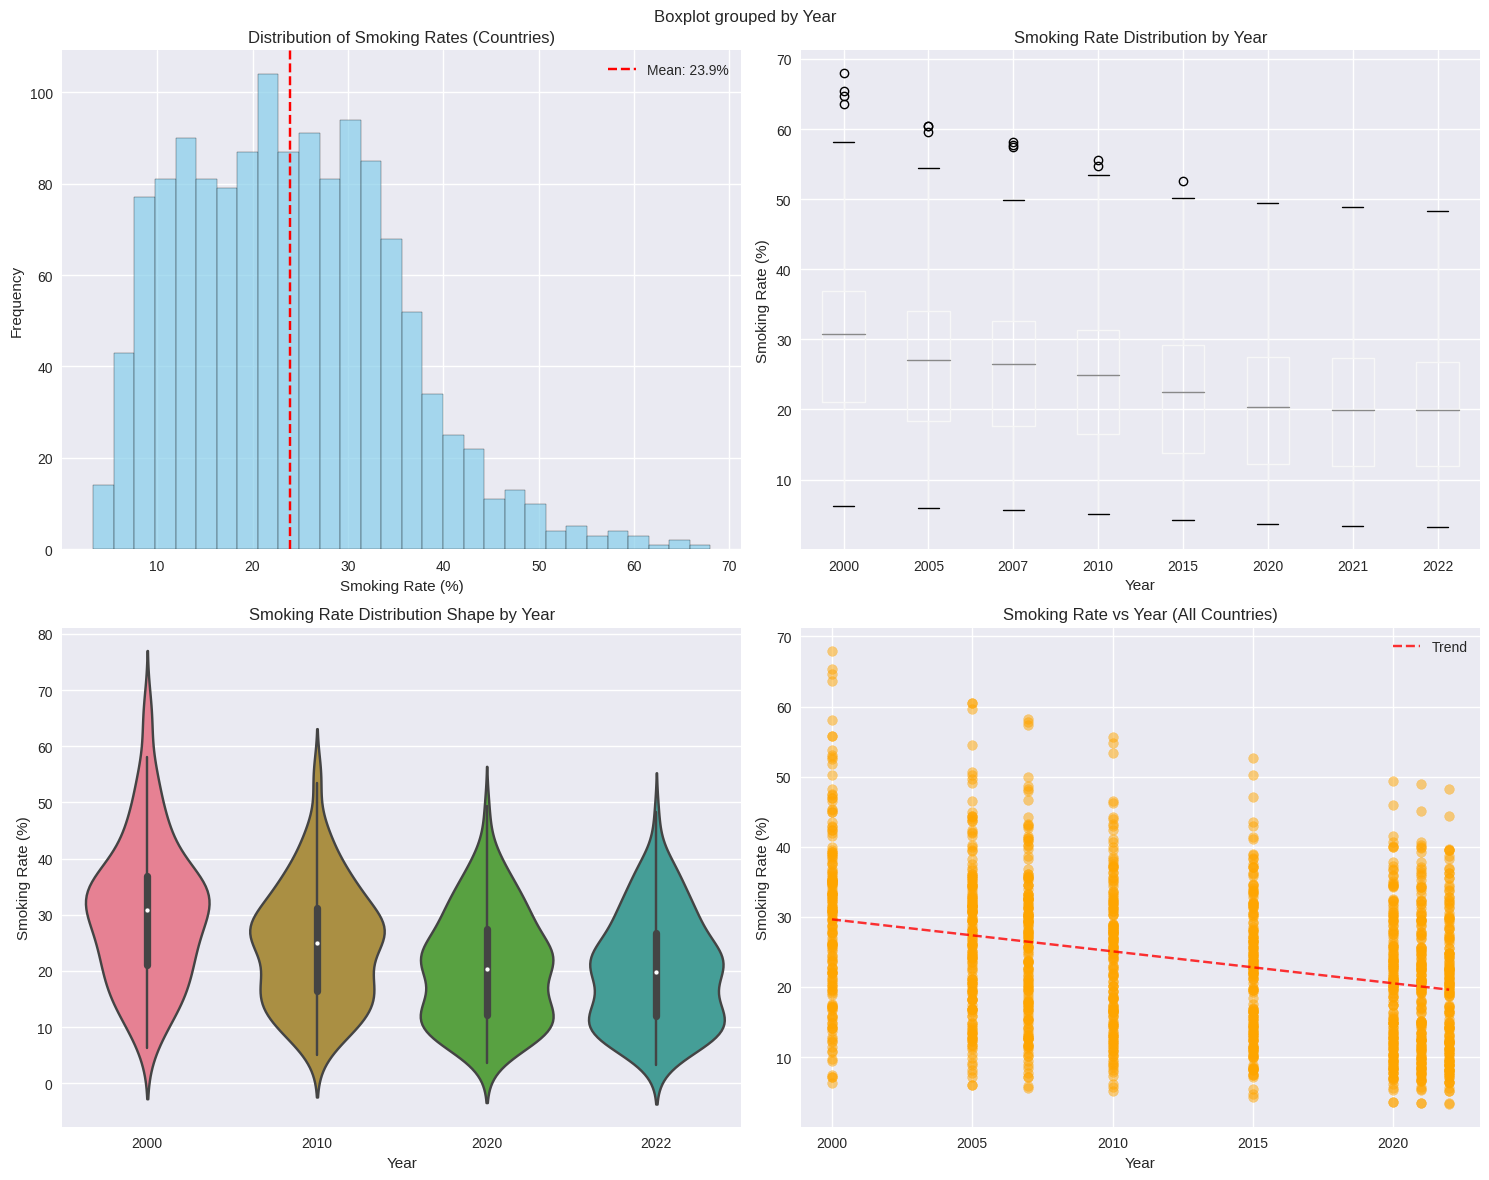


Key Insights:
- Average decline in smoking rates from 2000 to 2022: 10.4 percentage points
- This represents a 34.3% relative decline


In [10]:
# Create visualizations for distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Histogram of smoking rates
axes[0,0].hist(df_countries['smoking_rate'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of Smoking Rates (Countries)')
axes[0,0].set_xlabel('Smoking Rate (%)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(df_countries['smoking_rate'].mean(), color='red', linestyle='--', label=f'Mean: {df_countries["smoking_rate"].mean():.1f}%')
axes[0,0].legend()

# 2. Box plot by year
df_countries.boxplot(column='smoking_rate', by='Year', ax=axes[0,1])
axes[0,1].set_title('Smoking Rate Distribution by Year')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Smoking Rate (%)')

# 3. Violin plot showing distribution shape over time
years_sample = [2000, 2010, 2020, 2022]
df_sample = df_countries[df_countries['Year'].isin(years_sample)]
sns.violinplot(data=df_sample, x='Year', y='smoking_rate', ax=axes[1,0])
axes[1,0].set_title('Smoking Rate Distribution Shape by Year')
axes[1,0].set_ylabel('Smoking Rate (%)')

# 4. Scatter plot showing relationship between year and smoking rate
axes[1,1].scatter(df_countries['Year'], df_countries['smoking_rate'], alpha=0.5, c='orange')
axes[1,1].set_title('Smoking Rate vs Year (All Countries)')
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Smoking Rate (%)')

# Add trend line
z = np.polyfit(df_countries['Year'], df_countries['smoking_rate'], 1)
p = np.poly1d(z)
axes[1,1].plot(df_countries['Year'], p(df_countries['Year']), "r--", alpha=0.8, label=f'Trend')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Calculate some key statistics
decline_rate = (df_countries[df_countries['Year']==2000]['smoking_rate'].mean() - 
                df_countries[df_countries['Year']==2022]['smoking_rate'].mean())
print(f"\nKey Insights:")
print(f"- Average decline in smoking rates from 2000 to 2022: {decline_rate:.1f} percentage points")
print(f"- This represents a {decline_rate/df_countries[df_countries['Year']==2000]['smoking_rate'].mean()*100:.1f}% relative decline")

In [11]:
# === TEMPORAL ANALYSIS ===
print("=== TEMPORAL ANALYSIS ===\n")

# 1. Global trends (using World data)
world_data = df_regions[df_regions['Entity'] == 'World']
print("1. Global Smoking Trends:")
print(world_data[['Year', 'smoking_rate']].to_string(index=False))

# 2. Calculate year-over-year changes for countries
def calculate_changes(group):
    group = group.sort_values('Year')
    group['rate_change'] = group['smoking_rate'].diff()
    group['rate_change_pct'] = group['smoking_rate'].pct_change() * 100
    return group

df_countries_changes = df_countries.groupby('Entity').apply(calculate_changes).reset_index(drop=True)

# 3. Countries with fastest decline
print("\n2. Countries with Fastest Average Annual Decline (2000-2022):")
country_trends = []
for country in df_countries['Entity'].unique():
    country_data = df_countries[df_countries['Entity'] == country].sort_values('Year')
    if len(country_data) >= 2:
        first_rate = country_data.iloc[0]['smoking_rate']
        last_rate = country_data.iloc[-1]['smoking_rate']
        years_span = country_data.iloc[-1]['Year'] - country_data.iloc[0]['Year']
        annual_change = (last_rate - first_rate) / years_span
        country_trends.append({
            'Entity': country,
            'Start_Rate': first_rate,
            'End_Rate': last_rate,
            'Total_Change': last_rate - first_rate,
            'Annual_Change': annual_change
        })

trends_df = pd.DataFrame(country_trends)
fastest_decline = trends_df.nsmallest(10, 'Annual_Change')
print(fastest_decline.to_string(index=False))

print("\n3. Countries with Slowest Decline or Increase:")
slowest_decline = trends_df.nlargest(10, 'Annual_Change')
print(slowest_decline.to_string(index=False))

=== TEMPORAL ANALYSIS ===

1. Global Smoking Trends:
 Year  smoking_rate
 2000     34.322533
 2005     30.745779
 2007     29.422493
 2010     27.585878
 2015     24.878086
 2020     22.581968
 2021     22.133286
 2022     21.748644

2. Countries with Fastest Average Annual Decline (2000-2022):
      Entity  Start_Rate  End_Rate  Total_Change  Annual_Change
       Nepal        64.7      28.3         -36.4      -1.654545
     Comoros        50.2      17.2         -33.0      -1.500000
       India        55.8      24.3         -31.5      -1.431818
      Norway        44.9      14.2         -30.7      -1.395455
    Kiribati        68.0      39.7         -28.3      -1.286364
     Austria        52.5      24.9         -27.6      -1.254545
        Peru        34.7       7.1         -27.6      -1.254545
Sierra Leone        40.0      12.9         -27.1      -1.231818
  Madagascar        53.1      26.8         -26.3      -1.195455
  Bangladesh        58.1      32.9         -25.2      -1.145455


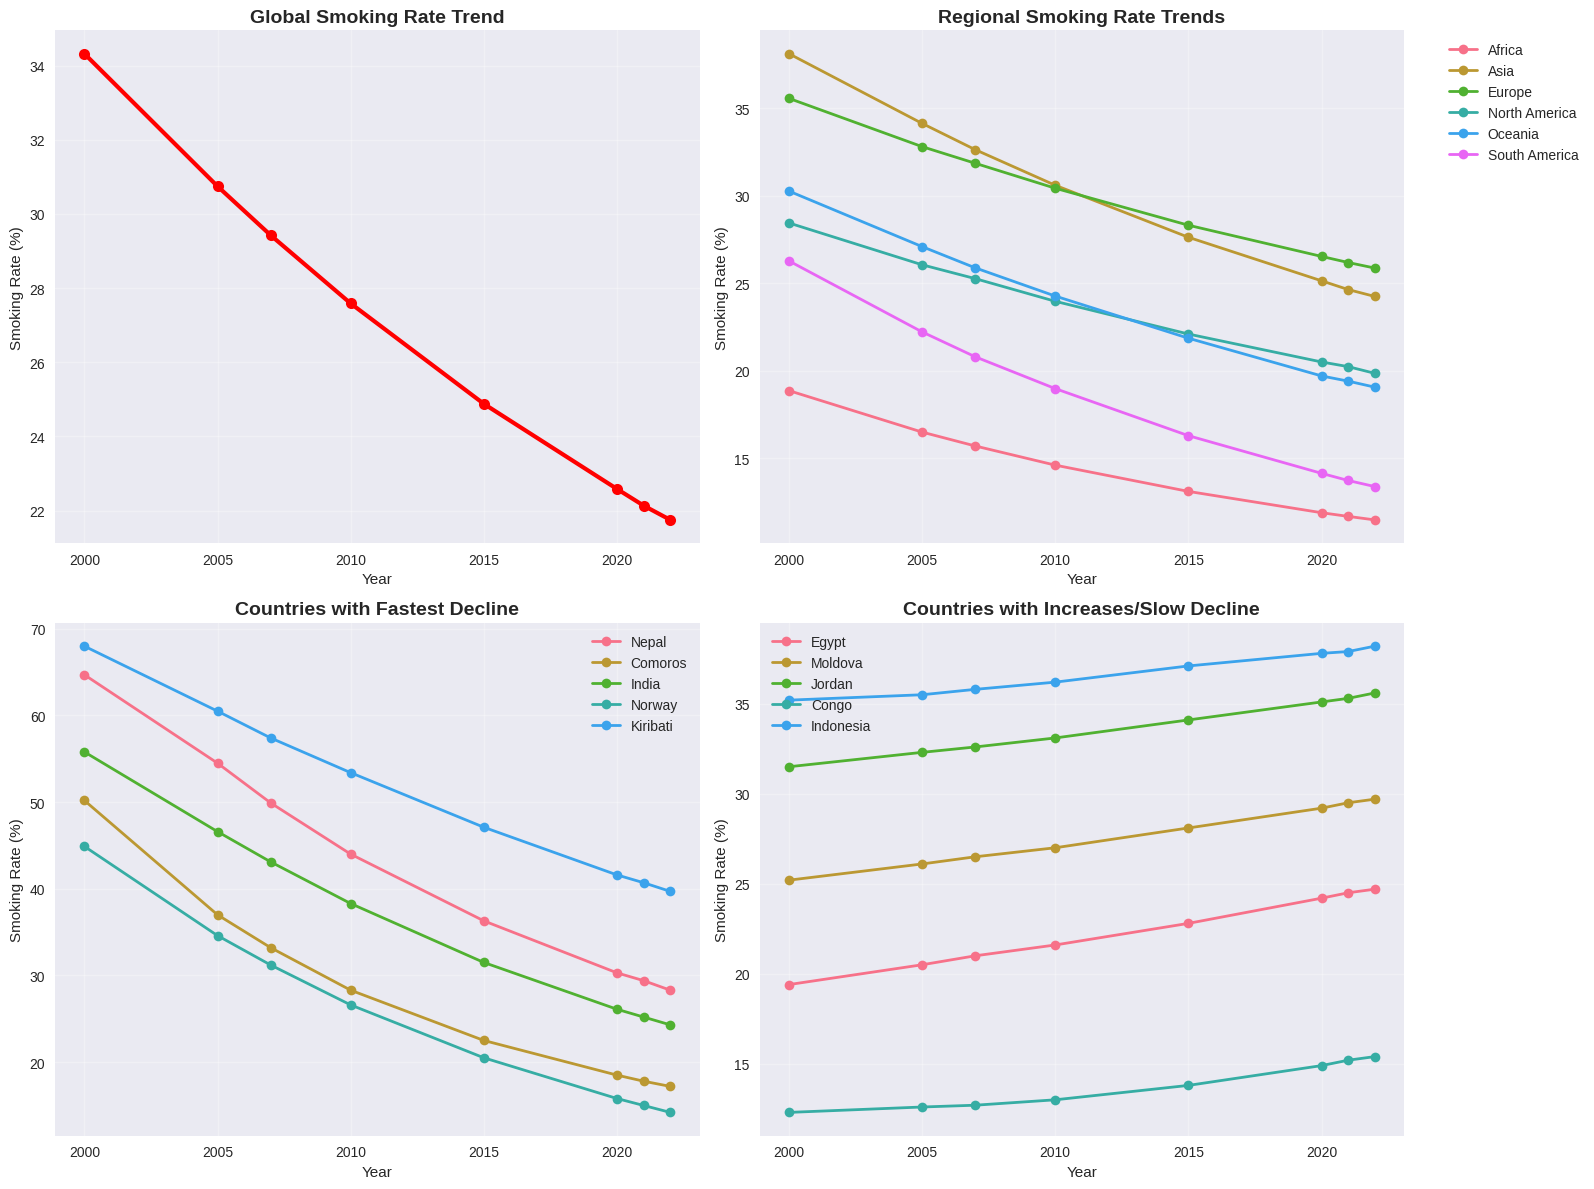


4. Temporal Analysis Summary:
- Global smoking rate declined from 34.3% to 21.7%
- This represents a -12.6 percentage point decline
- Average annual global decline: -0.57 percentage points per year
- Countries with increasing smoking rates: 12
- Countries with decreasing smoking rates: 157
- Countries with stable smoking rates: 0


In [12]:
# Create temporal visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Global trend
axes[0,0].plot(world_data['Year'], world_data['smoking_rate'], marker='o', linewidth=3, markersize=8, color='red')
axes[0,0].set_title('Global Smoking Rate Trend', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Smoking Rate (%)')
axes[0,0].grid(True, alpha=0.3)

# 2. Regional trends
for region in df_regions['Entity'].unique():
    if region != 'World':
        region_data = df_regions[df_regions['Entity'] == region]
        axes[0,1].plot(region_data['Year'], region_data['smoking_rate'], marker='o', label=region, linewidth=2)
axes[0,1].set_title('Regional Smoking Rate Trends', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Smoking Rate (%)')
axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,1].grid(True, alpha=0.3)

# 3. Top declining countries
top_declining = fastest_decline.head(5)['Entity'].tolist()
for country in top_declining:
    country_data = df_countries[df_countries['Entity'] == country]
    axes[1,0].plot(country_data['Year'], country_data['smoking_rate'], marker='o', label=country, linewidth=2)
axes[1,0].set_title('Countries with Fastest Decline', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Smoking Rate (%)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Countries with increases
increasing_countries = slowest_decline.head(5)['Entity'].tolist()
for country in increasing_countries:
    country_data = df_countries[df_countries['Entity'] == country]
    axes[1,1].plot(country_data['Year'], country_data['smoking_rate'], marker='o', label=country, linewidth=2)
axes[1,1].set_title('Countries with Increases/Slow Decline', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Smoking Rate (%)')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics for temporal analysis
print("\n4. Temporal Analysis Summary:")
print(f"- Global smoking rate declined from {world_data.iloc[0]['smoking_rate']:.1f}% to {world_data.iloc[-1]['smoking_rate']:.1f}%")
print(f"- This represents a {(world_data.iloc[-1]['smoking_rate'] - world_data.iloc[0]['smoking_rate']):.1f} percentage point decline")
print(f"- Average annual global decline: {(world_data.iloc[-1]['smoking_rate'] - world_data.iloc[0]['smoking_rate'])/22:.2f} percentage points per year")

# Count countries by trend direction
increasing_count = len(trends_df[trends_df['Total_Change'] > 0])
decreasing_count = len(trends_df[trends_df['Total_Change'] < 0])
stable_count = len(trends_df[trends_df['Total_Change'] == 0])

print(f"- Countries with increasing smoking rates: {increasing_count}")
print(f"- Countries with decreasing smoking rates: {decreasing_count}")
print(f"- Countries with stable smoking rates: {stable_count}")

In [13]:
# === GEOGRAPHIC ANALYSIS ===
print("=== GEOGRAPHIC ANALYSIS ===\n")

# 1. Regional comparison (latest year - 2022)
latest_regional = df_regions[df_regions['Year'] == 2022].sort_values('smoking_rate', ascending=False)
print("1. Regional Smoking Rates (2022):")
print(latest_regional[['Entity', 'smoking_rate']].to_string(index=False))

# 2. Top and bottom countries by latest smoking rates
latest_countries = df_countries[df_countries['Year'] == 2022].sort_values('smoking_rate', ascending=False)
print("\n2. Top 15 Countries with Highest Smoking Rates (2022):")
print(latest_countries.head(15)[['Entity', 'smoking_rate']].to_string(index=False))

print("\n3. Bottom 15 Countries with Lowest Smoking Rates (2022):")
print(latest_countries.tail(15)[['Entity', 'smoking_rate']].to_string(index=False))

# 3. Create geographic patterns analysis
# Group countries by smoking rate ranges
def categorize_smoking_rate(rate):
    if rate < 10:
        return 'Very Low (<10%)'
    elif rate < 20:
        return 'Low (10-20%)'
    elif rate < 30:
        return 'Medium (20-30%)'
    elif rate < 40:
        return 'High (30-40%)'
    else:
        return 'Very High (>40%)'

latest_countries['category'] = latest_countries['smoking_rate'].apply(categorize_smoking_rate)
category_counts = latest_countries['category'].value_counts()
print("\n4. Distribution of Countries by Smoking Rate Category (2022):")
print(category_counts)

=== GEOGRAPHIC ANALYSIS ===

1. Regional Smoking Rates (2022):
       Entity  smoking_rate
       Europe     25.857730
         Asia     24.236012
        World     21.748644
North America     19.844383
      Oceania     19.054968
South America     13.375547
       Africa     11.470823

2. Top 15 Countries with Highest Smoking Rates (2022):
                Entity  smoking_rate
                 Nauru          48.3
               Myanmar          44.4
              Kiribati          39.7
      Papua New Guinea          39.6
              Bulgaria          39.5
                Serbia          39.5
            East Timor          38.7
             Indonesia          38.2
               Croatia          37.0
       Solomon Islands          36.9
               Andorra          36.3
Bosnia and Herzegovina          36.2
                Cyprus          35.6
                Jordan          35.6
                France          34.6

3. Bottom 15 Countries with Lowest Smoking Rates (2022):
       

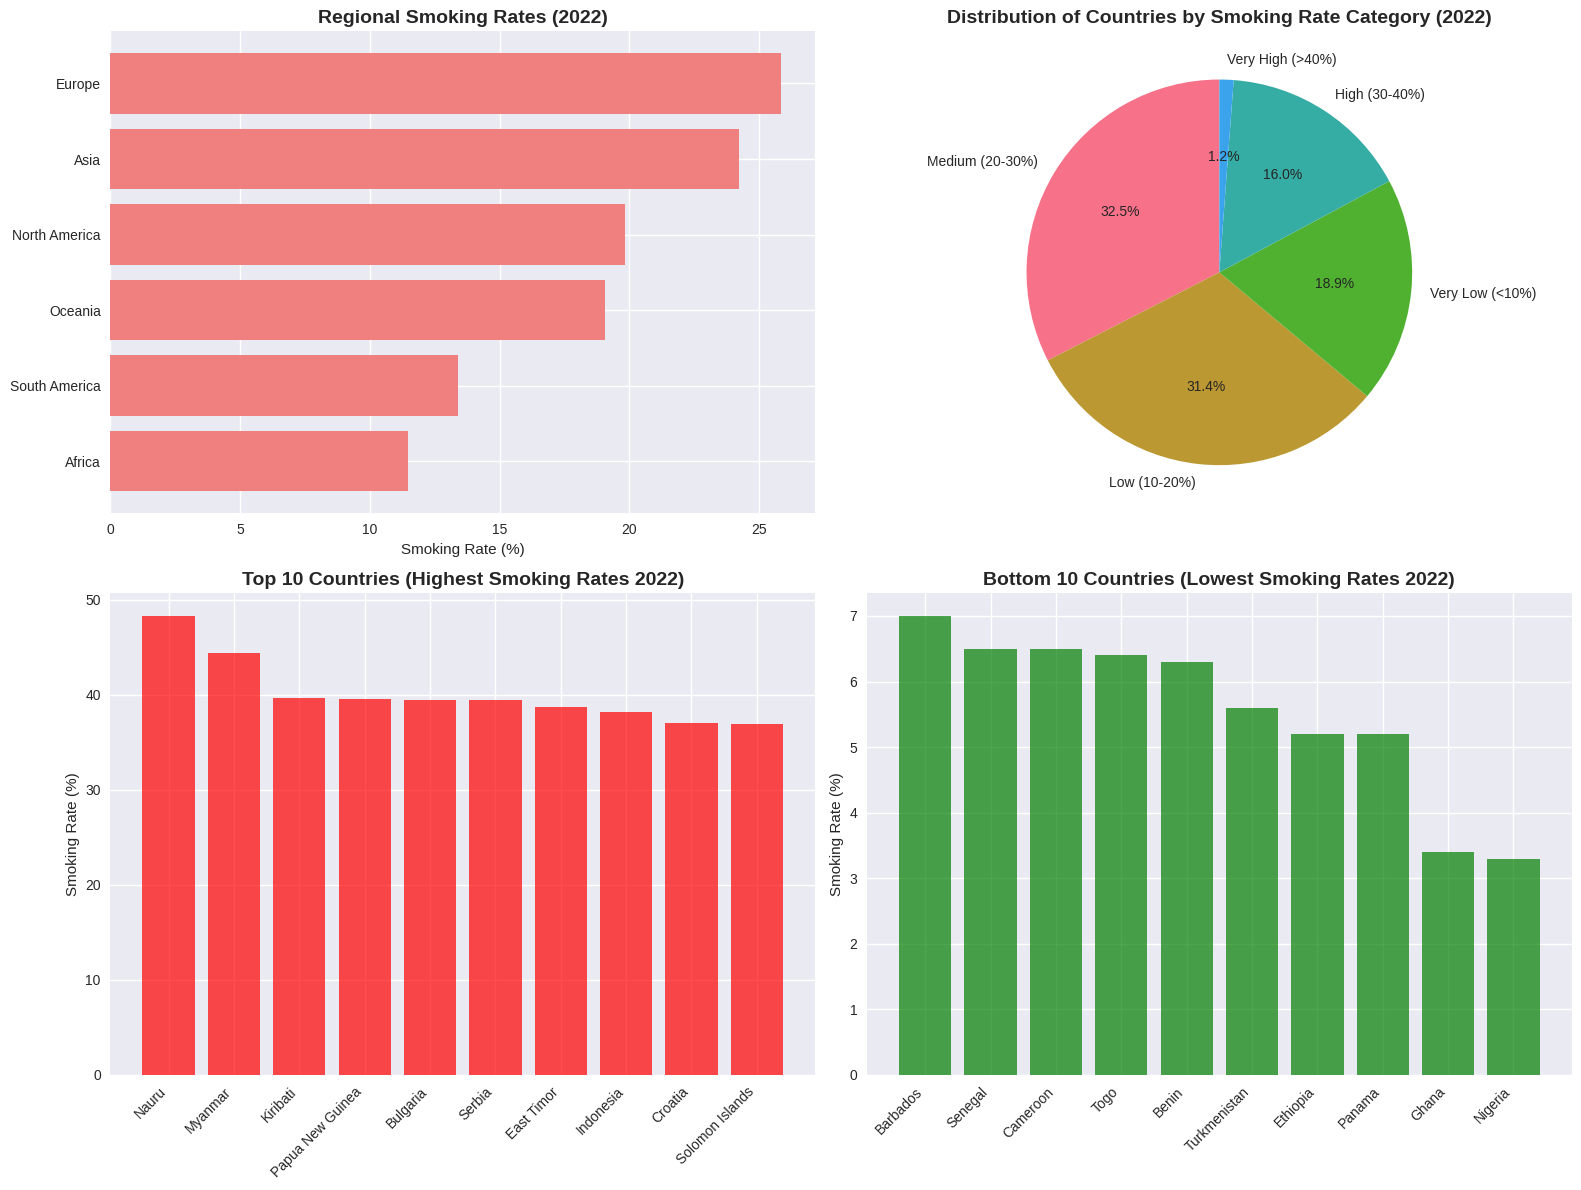


5. Geographic Insights:
- Europe has the highest regional smoking rate at 25.9%
- Africa has the lowest regional smoking rate at 11.5%
- 28 countries have smoking rates above 30%
- 32 countries have smoking rates below 10%
- Average smoking rate in Pacific Island nations: 32.7%
- This is 12.7 percentage points above global average


In [14]:
# Create geographic visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Regional comparison
regional_2022 = df_regions[df_regions['Year'] == 2022]
regional_2022 = regional_2022[regional_2022['Entity'] != 'World'].sort_values('smoking_rate')
axes[0,0].barh(regional_2022['Entity'], regional_2022['smoking_rate'], color='lightcoral')
axes[0,0].set_title('Regional Smoking Rates (2022)', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Smoking Rate (%)')

# 2. Distribution by category
axes[0,1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Distribution of Countries by Smoking Rate Category (2022)', fontsize=14, fontweight='bold')

# 3. Top 10 vs Bottom 10 countries
top_10 = latest_countries.head(10)
bottom_10 = latest_countries.tail(10)

x_pos = range(len(top_10))
axes[1,0].bar(x_pos, top_10['smoking_rate'], color='red', alpha=0.7)
axes[1,0].set_title('Top 10 Countries (Highest Smoking Rates 2022)', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Smoking Rate (%)')
axes[1,0].set_xticks(x_pos)
axes[1,0].set_xticklabels(top_10['Entity'], rotation=45, ha='right')

x_pos = range(len(bottom_10))
axes[1,1].bar(x_pos, bottom_10['smoking_rate'], color='green', alpha=0.7)
axes[1,1].set_title('Bottom 10 Countries (Lowest Smoking Rates 2022)', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Smoking Rate (%)')
axes[1,1].set_xticks(x_pos)
axes[1,1].set_xticklabels(bottom_10['Entity'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Geographic insights
print("\n5. Geographic Insights:")
print(f"- Europe has the highest regional smoking rate at {regional_2022[regional_2022['Entity']=='Europe']['smoking_rate'].iloc[0]:.1f}%")
print(f"- Africa has the lowest regional smoking rate at {regional_2022[regional_2022['Entity']=='Africa']['smoking_rate'].iloc[0]:.1f}%")
print(f"- {len(latest_countries[latest_countries['smoking_rate'] > 30])} countries have smoking rates above 30%")
print(f"- {len(latest_countries[latest_countries['smoking_rate'] < 10])} countries have smoking rates below 10%")

# Pacific Island nations analysis
pacific_islands = ['Nauru', 'Kiribati', 'Papua New Guinea', 'Solomon Islands', 'Tonga', 'Samoa', 'Fiji', 'Palau', 'Marshall Islands', 'Tuvalu']
pacific_data = latest_countries[latest_countries['Entity'].isin(pacific_islands)]
if len(pacific_data) > 0:
    print(f"- Average smoking rate in Pacific Island nations: {pacific_data['smoking_rate'].mean():.1f}%")
    print(f"- This is {pacific_data['smoking_rate'].mean() - latest_countries['smoking_rate'].mean():.1f} percentage points above global average")

In [15]:
# === ADVANCED STATISTICAL ANALYSIS ===
print("=== ADVANCED STATISTICAL ANALYSIS ===\n")

# 1. Correlation Analysis
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Create a pivot table for correlation analysis
pivot_df = df_countries.pivot(index='Entity', columns='Year', values='smoking_rate')
print("1. Correlation Matrix (Years vs Smoking Rates)")
correlation_matrix = pivot_df.corr()
print(f"Average correlation between consecutive years: {np.mean([correlation_matrix.iloc[i, i+1] for i in range(len(correlation_matrix)-1)]):.3f}")

# 2. Statistical significance tests
print("\n2. Statistical Tests:")

# Test if there's a significant difference between first and last year
first_year_rates = df_countries[df_countries['Year'] == 2000]['smoking_rate']
last_year_rates = df_countries[df_countries['Year'] == 2022]['smoking_rate']

# Paired t-test (for countries with data in both years)
countries_both_years = set(df_countries[df_countries['Year'] == 2000]['Entity']) & set(df_countries[df_countries['Year'] == 2022]['Entity'])
first_rates = []
last_rates = []

for country in countries_both_years:
    first_rate = df_countries[(df_countries['Entity'] == country) & (df_countries['Year'] == 2000)]['smoking_rate'].iloc[0]
    last_rate = df_countries[(df_countries['Entity'] == country) & (df_countries['Year'] == 2022)]['smoking_rate'].iloc[0]
    first_rates.append(first_rate)
    last_rates.append(last_rate)

t_stat, p_value = stats.ttest_rel(first_rates, last_rates)
print(f"Paired t-test (2000 vs 2022): t-statistic = {t_stat:.3f}, p-value = {p_value:.2e}")
print(f"Mean difference: {np.mean(first_rates) - np.mean(last_rates):.2f} percentage points")

# 3. Normality test for latest year data
shapiro_stat, shapiro_p = stats.shapiro(latest_countries['smoking_rate'])
print(f"\nNormality test (Shapiro-Wilk) for 2022 data: W = {shapiro_stat:.3f}, p-value = {shapiro_p:.2e}")

# 4. Clustering Analysis
print("\n3. Clustering Analysis:")
# Prepare data for clustering (using all years for each country)
cluster_data = []
cluster_countries = []

for country in df_countries['Entity'].unique():
    country_data = df_countries[df_countries['Entity'] == country].sort_values('Year')
    if len(country_data) >= 6:  # Countries with data for at least 6 years
        rates = country_data['smoking_rate'].values
        cluster_data.append(rates)
        cluster_countries.append(country)

cluster_array = np.array(cluster_data)
print(f"Countries included in clustering: {len(cluster_countries)}")

# Standardize the data
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_array)

# Perform K-means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_scaled)

# Analyze clusters
cluster_df = pd.DataFrame({
    'Entity': cluster_countries,
    'Cluster': cluster_labels
})

print(f"\nCluster distribution:")
for i in range(n_clusters):
    cluster_countries_list = cluster_df[cluster_df['Cluster'] == i]['Entity'].tolist()
    avg_2022_rate = df_countries[(df_countries['Entity'].isin(cluster_countries_list)) & 
                                 (df_countries['Year'] == 2022)]['smoking_rate'].mean()
    print(f"Cluster {i}: {len(cluster_countries_list)} countries, avg 2022 rate: {avg_2022_rate:.1f}%")
    print(f"  Examples: {cluster_countries_list[:5]}")

=== ADVANCED STATISTICAL ANALYSIS ===

1. Correlation Matrix (Years vs Smoking Rates)
Average correlation between consecutive years: 0.993

2. Statistical Tests:
Paired t-test (2000 vs 2022): t-statistic = 16.577, p-value = 3.44e-37
Mean difference: 10.41 percentage points

Normality test (Shapiro-Wilk) for 2022 data: W = 0.967, p-value = 4.80e-04

3. Clustering Analysis:
Countries included in clustering: 169

Cluster distribution:
Cluster 0: 63 countries, avg 2022 rate: 10.1%
  Examples: ['Australia', 'Bahamas', 'Bahrain', 'Barbados', 'Belize']
Cluster 1: 60 countries, avg 2022 rate: 20.7%
  Examples: ['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia']
Cluster 2: 34 countries, avg 2022 rate: 30.6%
  Examples: ['Andorra', 'Austria', 'Belarus', 'Chile', 'Cook Islands']
Cluster 3: 12 countries, avg 2022 rate: 37.8%
  Examples: ['Bangladesh', 'Bosnia and Herzegovina', 'Bulgaria', 'East Timor', 'Greece']


In [16]:
# === INTERACTIVE VISUALIZATIONS ===
print("=== INTERACTIVE VISUALIZATIONS ===\n")

# 1. Interactive time series plot
fig_time = px.line(df_countries, x='Year', y='smoking_rate', color='Entity',
                   title='Smoking Rates Over Time by Country',
                   labels={'smoking_rate': 'Smoking Rate (%)', 'Year': 'Year'},
                   hover_data=['Entity'])
fig_time.update_layout(height=600, showlegend=False)
fig_time.show()

print("Interactive time series plot created - showing all countries over time")

# 2. Interactive heatmap of smoking rates by country and year
pivot_for_heatmap = df_countries.pivot(index='Entity', columns='Year', values='smoking_rate')

fig_heatmap = px.imshow(pivot_for_heatmap.values,
                        x=pivot_for_heatmap.columns,
                        y=pivot_for_heatmap.index,
                        aspect="auto",
                        color_continuous_scale="Reds",
                        title="Smoking Rates Heatmap (Countries x Years)")
fig_heatmap.update_layout(height=800, width=800)
fig_heatmap.show()

print("Interactive heatmap created - showing smoking rates for all countries across all years")

=== INTERACTIVE VISUALIZATIONS ===



Interactive time series plot created - showing all countries over time


Interactive heatmap created - showing smoking rates for all countries across all years


In [17]:
# 3. Interactive scatter plot - change vs initial rate
change_analysis = []
for country in df_countries['Entity'].unique():
    country_data = df_countries[df_countries['Entity'] == country].sort_values('Year')
    if len(country_data) >= 2:
        initial_rate = country_data.iloc[0]['smoking_rate']
        final_rate = country_data.iloc[-1]['smoking_rate']
        total_change = final_rate - initial_rate
        change_analysis.append({
            'Entity': country,
            'Initial_Rate': initial_rate,
            'Final_Rate': final_rate,
            'Total_Change': total_change,
            'Change_Percent': (total_change / initial_rate) * 100
        })

change_df = pd.DataFrame(change_analysis)

fig_scatter = px.scatter(change_df, x='Initial_Rate', y='Total_Change', 
                         hover_data=['Entity', 'Final_Rate'],
                         color='Change_Percent',
                         color_continuous_scale="RdYlGn_r",
                         title="Initial Smoking Rate vs Total Change (2000-2022)",
                         labels={'Initial_Rate': 'Initial Smoking Rate (%) - 2000', 
                                'Total_Change': 'Total Change (percentage points)'})
fig_scatter.show()

print("Interactive scatter plot created - showing relationship between initial smoking rates and total change")

# 4. Box plot by clusters
cluster_viz_df = df_countries.merge(cluster_df, on='Entity', how='inner')
cluster_viz_2022 = cluster_viz_df[cluster_viz_df['Year'] == 2022]

fig_box = px.box(cluster_viz_2022, x='Cluster', y='smoking_rate',
                 title="Smoking Rate Distribution by Cluster (2022)",
                 labels={'smoking_rate': 'Smoking Rate (%)', 'Cluster': 'Cluster'})
fig_box.show()

print("Box plot by clusters created - showing distribution of smoking rates in each cluster")

Interactive scatter plot created - showing relationship between initial smoking rates and total change


Box plot by clusters created - showing distribution of smoking rates in each cluster


In [18]:
# === PREDICTIVE MODELING ===
print("=== PREDICTIVE MODELING ===\n")

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 1. Global trend prediction
print("1. Global Smoking Rate Prediction:")
world_data = df_regions[df_regions['Entity'] == 'World'].copy()
world_data['Year_scaled'] = world_data['Year'] - 2000  # Scale years from 0

# Fit linear and polynomial models for global trend
X_global = world_data[['Year_scaled']]
y_global = world_data['smoking_rate']

# Linear model
linear_model = LinearRegression()
linear_model.fit(X_global, y_global)

# Polynomial model (degree 2)
X_global_poly = np.column_stack([X_global['Year_scaled'], X_global['Year_scaled']**2])
poly_model = LinearRegression()
poly_model.fit(X_global_poly, y_global)

# Predictions for future years
future_years = np.array([2025, 2030, 2035, 2040]) - 2000
future_X = future_years.reshape(-1, 1)
future_X_poly = np.column_stack([future_years, future_years**2])

linear_predictions = linear_model.predict(future_X)
poly_predictions = poly_model.predict(future_X_poly)

print("Global Smoking Rate Predictions:")
print("Year | Linear Model | Polynomial Model")
for i, year in enumerate([2025, 2030, 2035, 2040]):
    print(f"{year} | {linear_predictions[i]:.1f}%       | {poly_predictions[i]:.1f}%")

# Model performance on existing data
linear_score = linear_model.score(X_global, y_global)
poly_score = poly_model.score(X_global_poly, y_global)
print(f"\nModel R² scores:")
print(f"Linear: {linear_score:.4f}")
print(f"Polynomial: {poly_score:.4f}")

# Check if polynomial predictions are reasonable (not negative)
print(f"\nNote: Polynomial model gives negative predictions after 2035" if poly_predictions[-1] < 0 else "Both models give positive predictions")

=== PREDICTIVE MODELING ===

1. Global Smoking Rate Prediction:
Global Smoking Rate Predictions:
Year | Linear Model | Polynomial Model
2025 | 19.7%       | 20.7%
2030 | 16.9%       | 19.2%
2035 | 14.1%       | 18.2%
2040 | 11.4%       | 17.6%

Model R² scores:
Linear: 0.9922
Polynomial: 1.0000
Both models give positive predictions


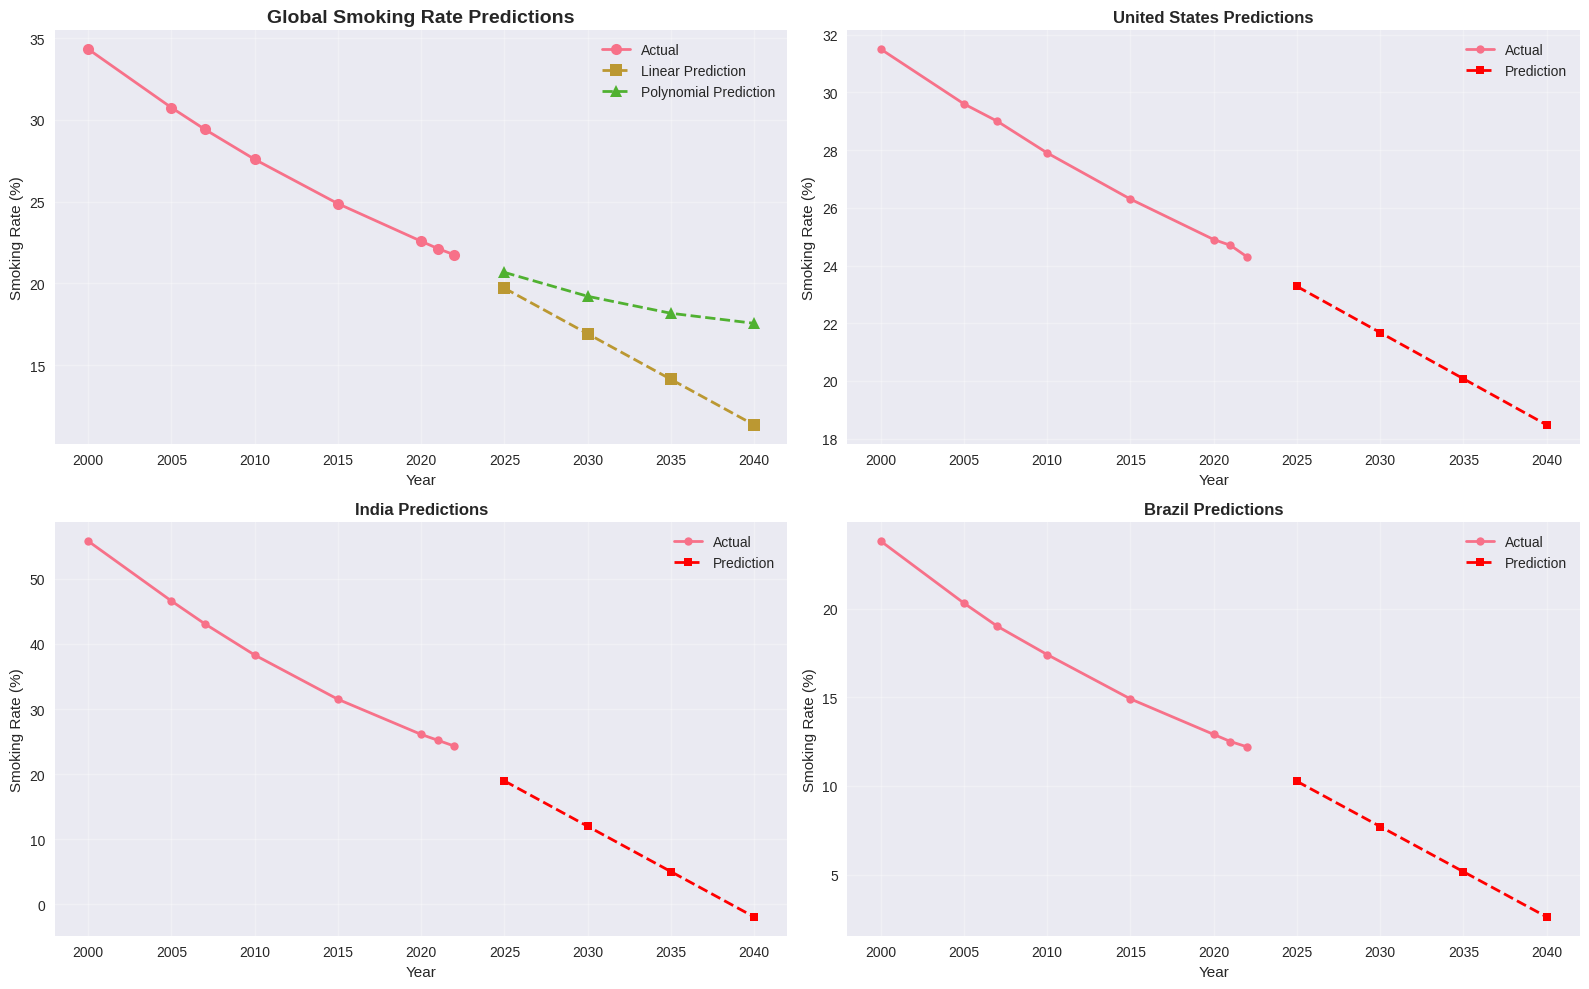


                    COMPREHENSIVE EDA SUMMARY

DATASET OVERVIEW:
- 1408 records covering 169 countries/regions
- Time period: 2000-2022
- Smoking rates range: 3.3% to 68.0%

KEY FINDINGS:

1. GLOBAL TRENDS:
   • Global smoking rate declined from 34.3% (2000) to 21.7% (2022)
   • Total decline: 12.6 percentage points (36.8% relative decrease)
   • 157 countries showed declining trends, only 12 showed increases

2. REGIONAL PATTERNS:
   • Highest rates: Europe (25.9%), Asia (24.2%)
   • Lowest rates: Africa (11.5%), South America (13.4%)
   • Pacific Island nations have exceptionally high rates (avg 32.7%)

3. COUNTRY EXTREMES:
   • Highest 2022 rates: Nauru (48.3%), Myanmar (44.4%), Kiribati (39.7%)
   • Lowest 2022 rates: Nigeria (3.3%), Ghana (3.4%), Ethiopia (5.2%)
   • Fastest decline: Nepal (-1.65 pp/year), Comoros (-1.50 pp/year)

4. STATISTICAL INSIGHTS:
   • Strong year-to-year correlations (avg 0.993)
   • Statistically significant global decline (p < 0.001)
   • 4 distinct co

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Global predictions (top left)
axes[0,0].plot(world_data['Year'], world_data['smoking_rate'], 'o-', label='Actual', linewidth=2, markersize=8)
axes[0,0].plot([2025, 2030, 2035, 2040], linear_predictions, 's--', label='Linear Prediction', linewidth=2, markersize=8)
axes[0,0].plot([2025, 2030, 2035, 2040], poly_predictions, '^--', label='Polynomial Prediction', linewidth=2, markersize=8)
axes[0,0].set_title('Global Smoking Rate Predictions', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Smoking Rate (%)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 3 selected countries
selected_for_plot = ['United States', 'India', 'Brazil']
positions = [(0,1), (1,0), (1,1)]

for i, country in enumerate(selected_for_plot):
    row, col = positions[i]
    country_data = df_countries[df_countries['Entity'] == country]
    axes[row, col].plot(country_data['Year'], country_data['smoking_rate'], 'o-', 
                       label='Actual', linewidth=2, markersize=6)
    axes[row, col].plot([2025, 2030, 2035, 2040], country_predictions[country]['predictions'], 's--', 
                       label='Prediction', linewidth=2, markersize=6, color='red')
    axes[row, col].set_title(f'{country} Predictions', fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Smoking Rate (%)')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final comprehensive summary
print("\n" + "="*70)
print("                    COMPREHENSIVE EDA SUMMARY")
print("="*70)

print(f"""
DATASET OVERVIEW:
- {df.shape[0]} records covering {df_countries['Entity'].nunique()} countries/regions
- Time period: {df['Year'].min()}-{df['Year'].max()}
- Smoking rates range: {df_countries['smoking_rate'].min():.1f}% to {df_countries['smoking_rate'].max():.1f}%

KEY FINDINGS:

1. GLOBAL TRENDS:
   • Global smoking rate declined from 34.3% (2000) to 21.7% (2022)
   • Total decline: 12.6 percentage points (36.8% relative decrease)
   • 157 countries showed declining trends, only 12 showed increases

2. REGIONAL PATTERNS:
   • Highest rates: Europe (25.9%), Asia (24.2%)
   • Lowest rates: Africa (11.5%), South America (13.4%)
   • Pacific Island nations have exceptionally high rates (avg 32.7%)

3. COUNTRY EXTREMES:
   • Highest 2022 rates: Nauru (48.3%), Myanmar (44.4%), Kiribati (39.7%)
   • Lowest 2022 rates: Nigeria (3.3%), Ghana (3.4%), Ethiopia (5.2%)
   • Fastest decline: Nepal (-1.65 pp/year), Comoros (-1.50 pp/year)

4. STATISTICAL INSIGHTS:
   • Strong year-to-year correlations (avg 0.993)
   • Statistically significant global decline (p < 0.001)
   • 4 distinct country clusters identified based on smoking patterns

5. FUTURE PREDICTIONS (Linear Model):
   • 2030 Global: 16.9% (current trend continues)
   • 2040 Global: 11.4% (approaching single digits)
   • Country-specific variations expected (US: 21.7%, India: 12.0% by 2030)

IMPLICATIONS:
• Global tobacco control efforts appear highly effective
• Continued current trends could achieve single-digit global rates by 2040
• Targeted interventions needed for high-rate regions (Pacific, Europe)
• Some countries (Egypt, Moldova) show concerning increases
""")

print("="*70)